In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import pickle

In [18]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

root_dir = os.getcwd() + "\\data\\reorganized"
categories = os.listdir(root_dir)
width = 32
height = 32
dim = (width, height)
data = []


In [19]:
def make_data():
    for category in categories:
        path = os.path.join(root_dir, category)
        label = categories.index(category)

        for img_name in os.listdir(path):
            image_path = os.path.join(path, img_name)
            image = cv2.imread(image_path)

            try:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, dim)
                image = np.array(image, dtype=np.float32)
                data.append([image, label])
            except Exception as e:
                pass

    pik = open('pickle/ham10000classifier.pickle', 'wb')
    pickle.dump(data, pik)
    pik.close()

In [20]:
make_data()

In [21]:
def load_data():
    pick = open('pickle/ham10000classifier.pickle', 'rb')
    data = pickle.load(pick)
    pick.close()

    feature = []
    labels = []

    for img, label in data:
        feature.append(img)
        labels.append(label)

    feature = np.array(feature, dtype=np.float32)
    labels = np.array(labels)
    feature = feature / 255.0
    return [feature, labels]

In [22]:
(feature, labels) = load_data()

In [23]:
from ModelResNet import create_model
from tensorflow.keras.optimizers import Adam

lr = 0.0001
model = create_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=lr),
              metrics=['acc'])



------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
100/100 [==============================] - 0s 980us/step - loss: 5.6076e-06 - acc: 1.0000 - val_loss: 3.2066 - val_acc: 0.7625
Score for fold 1: loss of 10.423677444458008; acc of 22.38532155752182%


d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


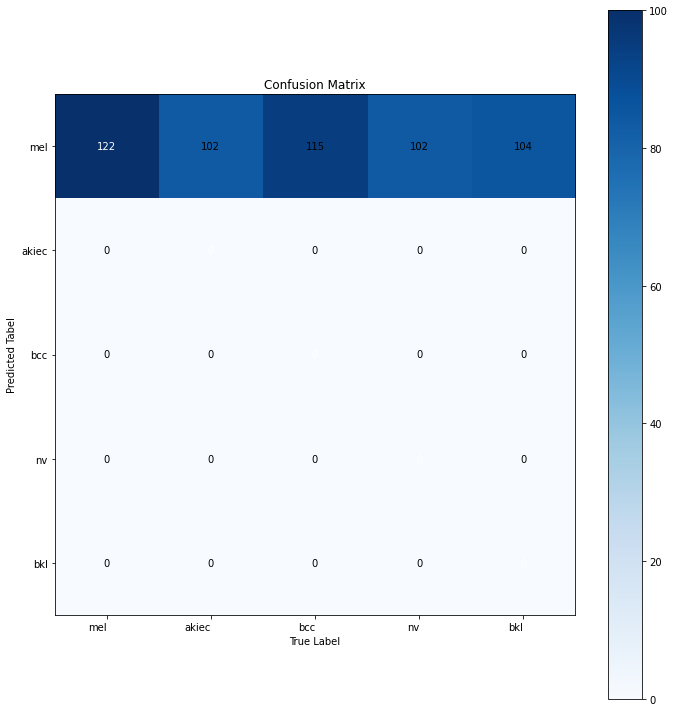

              precision    recall  f1-score   support

           0       0.22      1.00      0.37       122
           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       115
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00       104

    accuracy                           0.22       545
   macro avg       0.04      0.20      0.07       545
weighted avg       0.05      0.22      0.08       545

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
100/100 [==============================] - 0s 940us/step - loss: 5.4931e-06 - acc: 1.0000 - val_loss: 5.4890 - val_acc: 0.5938


d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score for fold 2: loss of 11.135879516601562; acc of 17.431192100048065%


d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


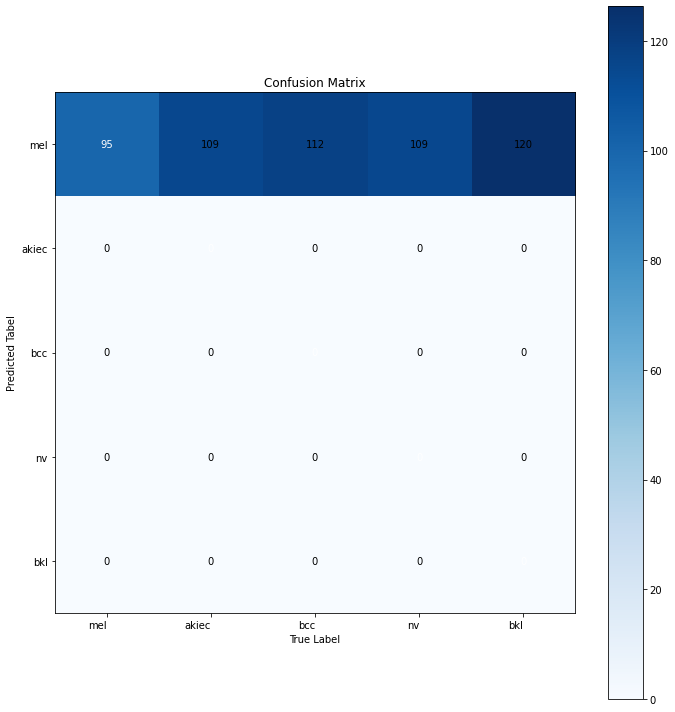

              precision    recall  f1-score   support

           0       0.17      1.00      0.30        95
           1       0.00      0.00      0.00       109
           2       0.00      0.00      0.00       112
           3       0.00      0.00      0.00       109
           4       0.00      0.00      0.00       120

    accuracy                           0.17       545
   macro avg       0.03      0.20      0.06       545
weighted avg       0.03      0.17      0.05       545

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
100/100 [==============================] - 0s 970us/step - loss: 5.4264e-06 - acc: 1.0000 - val_loss: 4.2249 - val_acc: 0.6875


d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score for fold 3: loss of 10.75653076171875; acc of 20.183485746383667%


d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


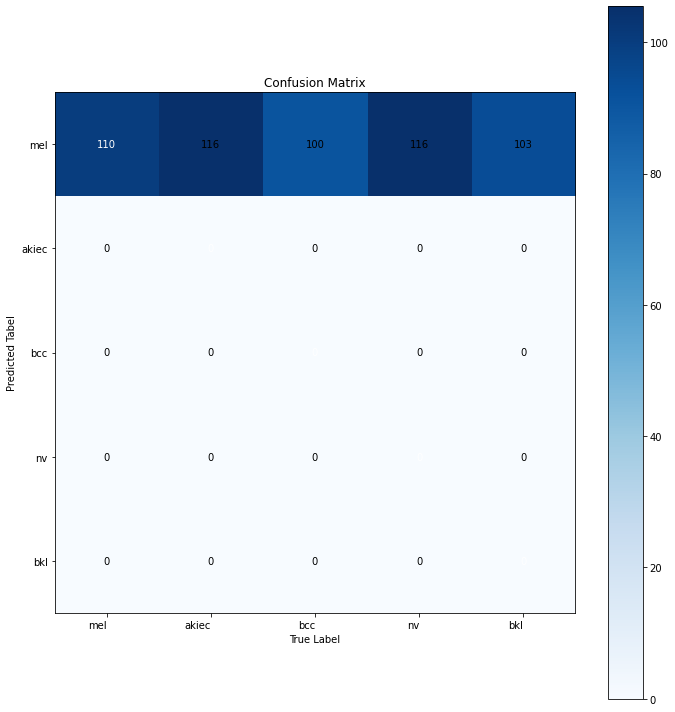

              precision    recall  f1-score   support

           0       0.20      1.00      0.34       110
           1       0.00      0.00      0.00       116
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       116
           4       0.00      0.00      0.00       103

    accuracy                           0.20       545
   macro avg       0.04      0.20      0.07       545
weighted avg       0.04      0.20      0.07       545

rata-rata acc pada learning rate  0.0001  adalah  0.20000000000000004
rata-rata presicion pada learning rate  0.0001 adalah 0.20000000000000004
rata-rata recall pada learning rate  0.0001 adalah 0.04
rata-rata F1 Score pada learning rate  0.0001 adalah 0.06657133026997952


d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pythonproject\hamclassification\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
inputs = feature
targets = labels
fold_no = 1

from KFoldTrain import KFoldtrain

KFoldtrain(num_folds=3,inputs=feature,targets=labels,model=model,categories=categories)

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization        dataset  label  
1617             face   vidir_modern      4  
8128  lower extremity    vienna_dias      5  
2168             back      rosendahl      4  
1090            trunk  vidir_molemax      2  
775

d:\pythonproject\hamclassification\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


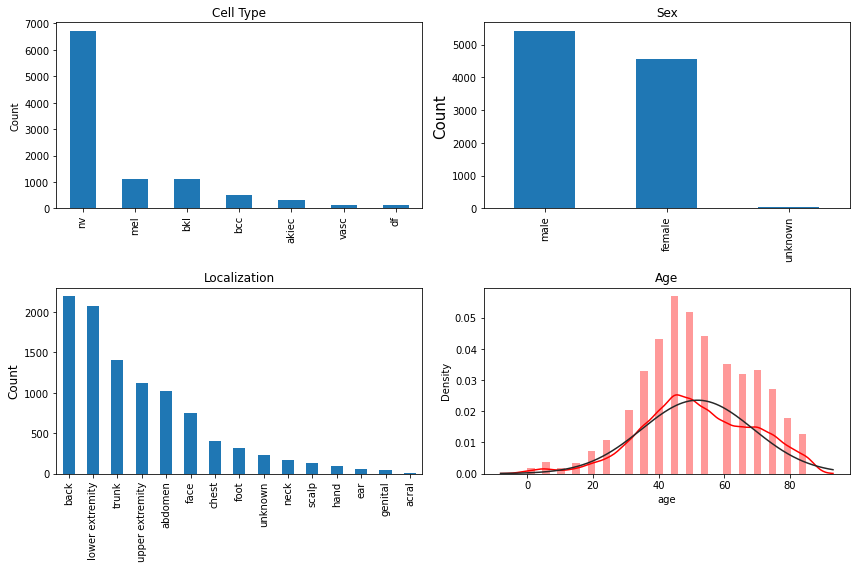

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64


AttributeError: 'NoneType' object has no attribute 'read'